<a href="https://colab.research.google.com/github/sbhutta123/CMSC320/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1:
Shifa Bhutta
DID: sbhutta
UID: 117275223
Date: 7/18/2023

In [1809]:
import numpy as np
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd
from urllib.request import urlopen

In [1810]:

g = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

r = requests.get(g, headers=headers)
if(r.status_code == 200):
  content = r.text
  soup = BeautifulSoup(content, "html.parser")
  solar_table = soup.find("table")
  rows = solar_table.find_all("tr")
  data = []
  for row in rows[1:]:

    cells = row.find_all("td")

    # Extract text from each cell
    row_data = [cell.text.strip() for cell in cells]

    # Append the row data
    data.append(row_data)


  columns = ["Rank", "X Class", "Date", "Region", "Start Time", "Maximum Time", "End Time", "Movie"]


  # Create a DataFrame
  df = pd.DataFrame(data,columns = columns)
  df.index = range(1, len(df) + 1)

  # Display the DataFrame
  print(df)









   Rank X Class        Date Region Start Time Maximum Time End Time  \
1     1    X28+  2003/11/04   0486      19:29        19:53    20:06   
2     2    X20+  2001/04/02   9393      21:32        21:51    22:03   
3     3  X17.2+  2003/10/28   0486      09:51        11:10    11:24   
4     4    X17+  2005/09/07   0808      17:17        17:40    18:03   
5     5   X14.4  2001/04/15   9415      13:19        13:50    13:55   
6     6     X10  2003/10/29   0486      20:37        20:49    21:01   
7     7    X9.4  1997/11/06   8100      11:49        11:55    12:01   
8     8    X9.3  2017/09/06   2673      11:53        12:02    12:10   
9     9      X9  2006/12/05   0930      10:18        10:35    10:45   
10   10    X8.3  2003/11/02   0486      17:03        17:25    17:39   
11   11    X8.2  2017/09/10   2673      15:35        16:06    16:31   
12   12    X7.1  2005/01/20   0720      06:36        07:01    07:26   
13   13    X6.9  2011/08/09   1263      07:48        08:05    08:08   
14   1

I use a web-API to retrieve the data and parse it on the "table" tag. Then I found the table rows and stripped the data before I added to a list (list of rows). Then I made a dataframe out of the list of rows and named the columns appropriately.

In [1811]:
from datetime import datetime



datetime_columns = ["Start Time", "Maximum Time", "End Time"]
for _, row in df.iterrows():
    for col in datetime_columns:
          datetime_str = f"{row['Date']} {row[col]}"
          datetime_obj = datetime.strptime(datetime_str, "%Y/%m/%d %H:%M")
          df.at[row.name, col] = datetime_obj.strftime("%Y-%m-%d %H:%M:%S")

# Set regions coded as "-" as missing (NaN)
#drop unnecessary columns
#rename columns
df.replace({"-"}, inplace=True, value=pd.NA)
region_column = df.pop("Region")
date_column = df.pop("Date")
df.insert(len(df.columns), "Region", region_column)
df.rename(columns={"Start Time": "start_datetime"}, inplace=True)
df.rename(columns={"Maximum Time": "max_datetime"}, inplace=True)
df.rename(columns={"End Time": "end_datetime"}, inplace=True)
df = df.drop(columns=[columns[-1]])
df_top_50 = df




print(df_top_50)

   Rank X Class       start_datetime         max_datetime  \
1     1    X28+  2003-11-04 19:29:00  2003-11-04 19:53:00   
2     2    X20+  2001-04-02 21:32:00  2001-04-02 21:51:00   
3     3  X17.2+  2003-10-28 09:51:00  2003-10-28 11:10:00   
4     4    X17+  2005-09-07 17:17:00  2005-09-07 17:40:00   
5     5   X14.4  2001-04-15 13:19:00  2001-04-15 13:50:00   
6     6     X10  2003-10-29 20:37:00  2003-10-29 20:49:00   
7     7    X9.4  1997-11-06 11:49:00  1997-11-06 11:55:00   
8     8    X9.3  2017-09-06 11:53:00  2017-09-06 12:02:00   
9     9      X9  2006-12-05 10:18:00  2006-12-05 10:35:00   
10   10    X8.3  2003-11-02 17:03:00  2003-11-02 17:25:00   
11   11    X8.2  2017-09-10 15:35:00  2017-09-10 16:06:00   
12   12    X7.1  2005-01-20 06:36:00  2005-01-20 07:01:00   
13   13    X6.9  2011-08-09 07:48:00  2011-08-09 08:05:00   
14   14    X6.5  2006-12-06 18:29:00  2006-12-06 18:47:00   
15   15    X6.2  2005-09-09 19:13:00  2005-09-09 20:04:00   
16   16    X6.2  2001-12

To tidy the dataframe, I used the datetime package to reformat my date and time and combine them into one column. Then, I renamed the columns and dropped the ones that were no longer needed.

In [1812]:
r = requests.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html")
data = []

# Check if the request was successful (status code 200)
if (r.status_code == 200):
    # Extract the text from the page
    content = r.text

    soup = BeautifulSoup(content, "html.parser")
    text = soup.find("pre").get_text()
    lines = text.split("\n")[12:-2]
    columns = ["start_date", "start_time", "end_date", "end_time", "start_frequency", "end_frequency",
                    "flare_location", "flare_region", "flare_classification", "cme_date", "cme_time", "cme_angle",
                    "cme_width", "cme_speed","plot"]
    rows = [line.split(',') for line in lines]
    rows = [line.split() for line in lines]
    for r in rows:
      r = r[:15]
      data.append(r)

    #print(rows)
    df = pd.DataFrame(data, columns=columns)
    df.index = range(1, len(df) + 1)

    types_row = ["<chr>"] * len(columns)
    df_types = pd.DataFrame([types_row], columns=columns)

    # Concatenate the DataFrame with types row to the original DataFrame
    df_types = pd.concat([df_types, df])

    # Display the DataFrame
    print(df_types)


     start_date start_time end_date end_time start_frequency end_frequency  \
0         <chr>      <chr>    <chr>    <chr>           <chr>         <chr>   
1    1997/04/01      14:00    04/01    14:15            8000          4000   
2    1997/04/07      14:30    04/07    17:30           11000          1000   
3    1997/05/12      05:15    05/14    16:00           12000            80   
4    1997/05/21      20:20    05/21    22:00            5000           500   
..          ...        ...      ...      ...             ...           ...   
518  2017/09/17      11:45    09/17    12:35           16000           900   
519  2017/10/18      05:48    10/18    12:40           16000           400   
520  2019/05/03      23:52    05/04    00:16           13000          2300   
521  2020/11/29      13:07    11/29    15:23           14000           850   
522  2020/12/07      16:18    12/08    02:00           14000           160   

    flare_location flare_region flare_classification cme_date c

I used a web API to read the file and used BeautifulSoup as well as the split() function to get the data into rows. Then, I cut off the rows after "plot" and added the <chr> type to the table.

In [1813]:
df.replace({"????","------","-----","----","--/--","--:--","---"}, inplace=True, value="NaN")

# Convert date and time columns to datetime format
datetime_columns = ["start_date", "end_date","cme_date"]
time_col = ["start_time","end_time","cme_time"]
i = 0

for _, row in df.iterrows():
        for i, col in enumerate(datetime_columns):
            datetime_str = f"{row[col]} {row[time_col[i]]}"
            if (col != 'start_date' and datetime_str.find("NaN") == -1):
              start_str = f"{row['start_date']} {row[time_col[i]]}"
              start_year = start_str[0:4]
              datetime_str = start_year + '/' + datetime_str
            if (datetime_str.find("NaN") == -1):
              if (datetime_str[-5::] == '24:00'):
                datetime_str = datetime_str.replace('24:00','00:00')
              if len(datetime_str) > 12:
                  datetime_obj = datetime.strptime(datetime_str, "%Y/%m/%d %H:%M")
              else:
                  datetime_obj = datetime.strptime(datetime_str, "%m/%d %H:%M")
              df.at[row.name, col] = datetime_obj.strftime("%Y-%m-%d %H:%M:%S")

#rename and drop columns

df.rename(columns={"start_date": "start_datetime"}, inplace=True)
df.rename(columns={"end_date": "end_datetime"}, inplace=True)
df.rename(columns={"cme_date": "cme_datetime"}, inplace=True)
df = df.drop(columns=[columns[1]])
df = df.drop(columns=[columns[3]])
df = df.drop(columns=[columns[-5]])
df["is_halo"] = df["cme_angle"].str.contains("Halo")
df["is_lower_bound"] = df["cme_width"].str.contains(">")
df.replace({"cme_angle": "Halo"}, inplace=True, value="NA")
df["cme_width"] = df["cme_width"].str.replace(">", "")
df_nasa = df







print(df_nasa)


          start_datetime         end_datetime start_frequency end_frequency  \
1    1997-04-01 14:00:00  1997-04-01 14:15:00            8000          4000   
2    1997-04-07 14:30:00  1997-04-07 17:30:00           11000          1000   
3    1997-05-12 05:15:00  1997-05-14 16:00:00           12000            80   
4    1997-05-21 20:20:00  1997-05-21 22:00:00            5000           500   
5    1997-09-23 21:53:00  1997-09-23 22:16:00            6000          2000   
..                   ...                  ...             ...           ...   
518  2017-09-17 11:45:00  2017-09-17 12:35:00           16000           900   
519  2017-10-18 05:48:00  2017-10-18 12:40:00           16000           400   
520  2019-05-03 23:52:00  2019-05-04 00:16:00           13000          2300   
521  2020-11-29 13:07:00  2020-11-29 15:23:00           14000           850   
522  2020-12-07 16:18:00  2020-12-08 02:00:00           14000           160   

    flare_location flare_region flare_classificatio

To tidy the dataframe, I replaced missing values with 'NaN' as well as combined the date and time for the start, end, and cme times. Then, I added 2 new columns that contained booleans and dropped the columns that were no longer needed as well as changed data that was no longer relevant because of the new columns (Halo and >signs)

In [1814]:

rank_list = []
index_list = []
rank_data = []
max_num = 0
i = 0
index = 0
found = 0
columns = ["start_datetime", "end_datetime","start_frequency", "end_frequency",
                    "flare_location", "flare_region", "flare_classification", "cme_datetime", "cme_angle",
                    "cme_width", "cme_speed","plot","is_halo","is_lower_bound"]
for rank in df["flare_classification"]:
    if (rank[0] == 'X'):
      number = float(rank[1::])
      if (number <= 28.0):
          rank_list.append(number)
          rank_list.sort(reverse=True)
for i in range(50):
  for rank in df["flare_classification"]:
    if (rank[0] == 'X'):
      number = float(rank[1::])
      if (number == rank_list[i] and found == 0):
        rank_data.append(df.iloc[index].tolist())
        found = 1
    index+=1
  found = 0
  index = 0


df_rank = pd.DataFrame(rank_data, columns=columns)
df_rank.index = range(1, len(df_rank) + 1)
print(df_rank)










         start_datetime         end_datetime start_frequency end_frequency  \
1   2003-11-04 20:00:00  2003-11-04 00:00:00           10000           200   
2   2001-04-02 22:05:00  2001-04-03 02:30:00           14000           250   
3   2003-10-28 11:10:00  2003-10-29 00:00:00           14000            40   
4   2001-04-15 14:05:00  2001-04-16 13:00:00           14000            40   
5   2003-10-29 20:55:00  2003-10-29 00:00:00           11000           500   
6   1997-11-06 12:20:00  1997-11-07 08:30:00           14000           100   
7   2017-09-06 12:05:00  2017-09-07 08:00:00           16000            70   
8   2006-12-05 10:50:00  2006-12-05 20:00:00           14000           250   
9   2003-11-02 17:30:00  2003-11-03 01:00:00           12000           250   
10  2003-11-02 17:30:00  2003-11-03 01:00:00           12000           250   
11  2005-01-20 07:15:00  2005-01-20 16:30:00           14000            25   
12  2011-08-09 08:20:00  2011-08-09 08:35:00           16000    

The classification (X28, X2.2,X20., etc) and the regions are very similar. The dates are similar as well but the timings are different since the NASA table shows the flares lasting a lot longer than the spaceweather table shows.

In [1815]:
def find_best_matching_row(spaceweather_data, nasa_data_50):
  i = 0
  j = 0
  score = 0
  first = True
  row_list = []
  temp_row = []




  best_match_score = float('inf')
  best_match_row = None

  #iterates through both lists, getting the start_time, end_time and classification
  for spaceweather in spaceweather_data.iterrows():
        spaceweather_row = spaceweather_data.iloc[i].tolist()
        spaceweather_end_date = spaceweather_row[-1]
        spaceweather_start_date = spaceweather_row[-2]
        spaceweather_class = spaceweather_row[1]
        if (spaceweather_class[-1] != '+'):
          rank = float(spaceweather_class[1::])
        elif(spaceweather_class[-1] == '+'):
          rank = float(spaceweather_class[1:-1])
        spaceweather_class = rank

        for nasa_row in nasa_data_50.iterrows():
            nasa_top_50_row = nasa_data_50.iloc[j].tolist()
            nasa_start_date = nasa_top_50_row[-2]
            nasa_end_date = nasa_top_50_row[-1]
            nasa_class = nasa_top_50_row[6]
            if (nasa_class[0] == 'X'):
              nasa_rank = float(nasa_class[1::])
            elif(nasa_class[0] != 'X'):
              nasa_rank = 0
            nasa_class = nasa_rank
            j+= 1
            #adds ranking or NA if not applicable
            if (nasa_class == spaceweather_class):
              nasa_top_50_row.append(spaceweather_row[0])
            else:
              nasa_top_50_row.append('NA')

            #compares the start_times, end_times, and classification
            date_start_diff = abs((nasa_start_date - spaceweather_start_date))
            date_end_diff = abs((nasa_end_date - spaceweather_end_date))

            classification_diff = abs(nasa_class - spaceweather_class)

            #calculates score based on differences
            score = date_start_diff + date_end_diff + classification_diff

            #finds best score and records the best row
            if score < best_match_score:
                best_match_score = score
                best_row = nasa_top_50_row



        j= 0
        i+=1
        row_list.append(best_row)


  return row_list







In [1816]:

i = 0
#converted the datetimes to numeric objects I could do arithmetic with
col = pd.to_datetime(df_top_50['start_datetime'],errors="coerce")
df_top_50["start_time"] = col.dt.year * 10000 + col.dt.month * 100 + col.dt.day + (col.dt.hour * 100) + col.dt.minute

col_end = pd.to_datetime(df_top_50['end_datetime'],errors="coerce")
df_top_50["end_time"] = col_end.dt.year * 10000 + col_end.dt.month * 100 + col_end.dt.day + (col_end.dt.hour * 100) + col_end.dt.minute

col = pd.to_datetime(df_nasa['start_datetime'],errors="coerce")
df_nasa["start_time"] = col.dt.year * 10000 + col.dt.month * 100 + col.dt.day + (col.dt.hour * 100) + col.dt.minute

col_end = pd.to_datetime(df_nasa['end_datetime'],errors="coerce")
df_nasa["end_time"] = col_end.dt.year * 10000 + col_end.dt.month * 100 + col_end.dt.day + (col_end.dt.hour * 100) + col_end.dt.minute

columns = ["start_datetime", "end_datetime","start_frequency", "end_frequency",
                    "flare_location", "flare_region", "flare_classification", "cme_datetime", "cme_angle",
                    "cme_width", "cme_speed","plot","is_halo","is_lower_bound","start_time", "end_time","rank"]


#made a new data frame
best_rows = find_best_matching_row(df_top_50, df_nasa)

best_matching_rows_df = pd.DataFrame(best_rows, columns = columns)

best_matching_rows_df = best_matching_rows_df.drop(columns=[columns[-3]])
best_matching_rows_df = best_matching_rows_df.drop(columns=[columns[-2]])


print(best_matching_rows_df)








         start_datetime         end_datetime start_frequency end_frequency  \
0   2003-10-26 17:45:00  2003-10-26 19:40:00           14000          1500   
1   2001-10-22 15:15:00  2001-10-22 17:40:00            8000          1200   
2   2003-11-13 09:35:00  2003-11-13 10:50:00           14000          4000   
3   2005-06-16 20:25:00  2005-06-16 21:40:00            9000          1000   
4   2001-09-17 08:35:00  2001-09-17 08:47:00           14000          5400   
5   2001-09-17 08:35:00  2001-09-17 08:47:00           14000          5400   
6   2001-09-17 08:35:00  2001-09-17 08:47:00           14000          5400   
7   2001-09-17 08:35:00  2001-09-17 08:47:00           14000          5400   
8   2001-09-17 08:35:00  2001-09-17 08:47:00           14000          5400   
9   2001-09-17 08:35:00  2001-09-17 08:47:00           14000          5400   
10  2001-09-17 08:35:00  2001-09-17 08:47:00           14000          5400   
11  2001-09-17 08:35:00  2001-09-17 08:47:00           14000    

I defined best matching rows by the differences of dates. I made the start_datetime and end_datetime columns numbers and then took the difference of those values using both dataframes as well as using the classification as a tertiary factor. I then added up the scores and whichever was the lowest was then seen as the best match and the corresponding row for that score was added to a list which later became a dataframe.

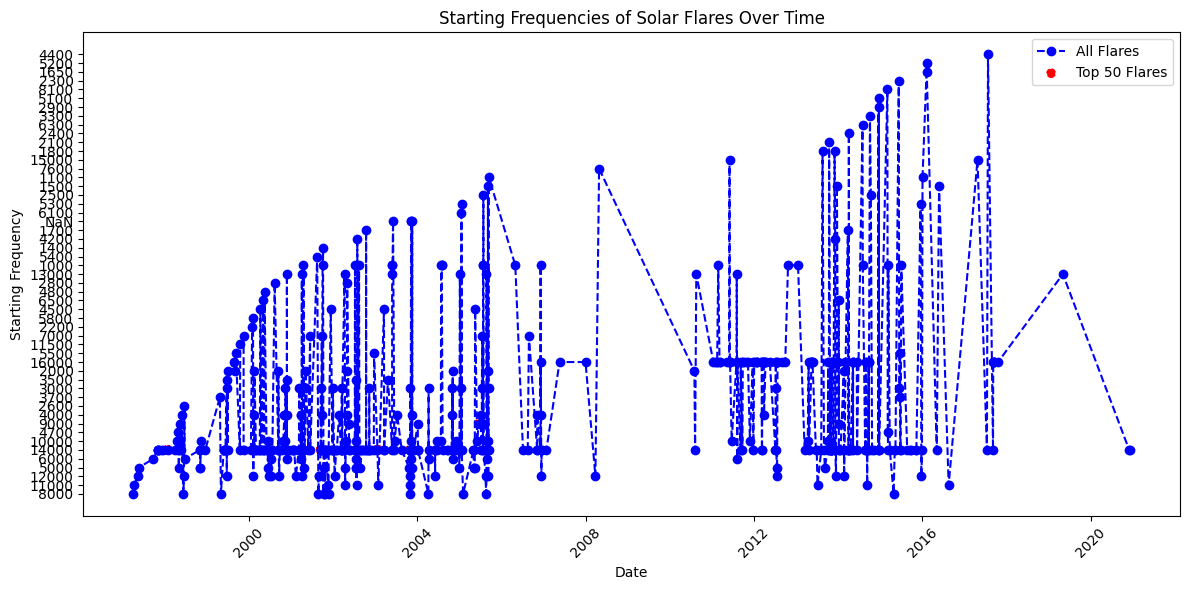

In [1817]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert the date columns to datetime objects
df_nasa["start_date"] = pd.to_datetime(df_nasa["start_datetime"])
df_nasa["end_date"] = pd.to_datetime(df_nasa["end_datetime"])
best_matching_rows_df["start_date"] = pd.to_datetime(best_matching_rows_df["start_datetime"])
best_matching_rows_df["end_date"] = pd.to_datetime(best_matching_rows_df["end_datetime"])


# Plot the starting frequencies of all solar flares over time
plt.figure(figsize=(12, 6))
plt.plot(df_nasa["start_date"], df_nasa["start_frequency"], label="All Flares", color="blue", marker="o", linestyle="dashed")

# Use red points to indicate the top 50 flares
plt.scatter(best_matching_rows_df["start_date"], best_matching_rows_df["start_frequency"], color="red", marker="o", label="Top 50 Flares", linestyle="dashed")

# plot labels and title
plt.xlabel("Date")
plt.ylabel("Starting Frequency")
plt.title("Starting Frequencies of Solar Flares Over Time")
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


The intention of my plot is to show the spread as well as the variation between the flares. As you can see there is a lot of clustering especially when you lokkat the lower frequencies. It is skewed to the left as seen by the tail. There were more flares from 1997-2006, and most of the strong flares came from that time.